# Business Problem : Identify Potential Customers for Marketing Campaign

In [1]:
# Import the Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Santosh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Load The dataset

customers=pd.read_csv("Kmeans data.csv")

In [4]:
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Extract Income and Spending score

dataset=customers.iloc[:, [3,4]]
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
# Using Elbow Method to find Optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

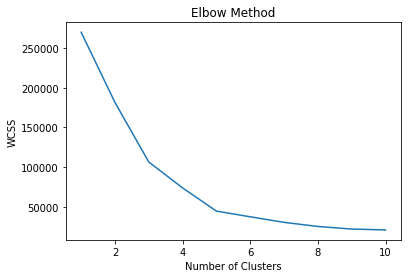

In [14]:
# Plot for Elbow Method

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# considering number of clusters=5
# Fitting Kmeans to dataset
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_clusters=kmeans.fit_predict(dataset)

In [18]:
#visualize the clusters
dataset['clusters']=y_clusters
d1=dataset[dataset.clusters==0]
d2=dataset[dataset.clusters==1]
d3=dataset[dataset.clusters==2]
d4=dataset[dataset.clusters==3]
d5=dataset[dataset.clusters==4]

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


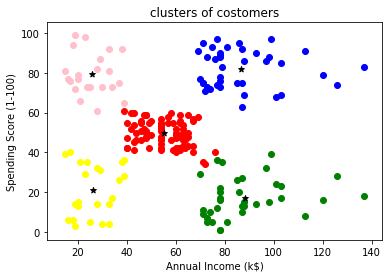

In [29]:
plt.scatter(d1['Annual Income (k$)'], d1['Spending Score (1-100)'], color='green')
plt.scatter(d2['Annual Income (k$)'], d2['Spending Score (1-100)'], color='red')
plt.scatter(d3['Annual Income (k$)'], d3['Spending Score (1-100)'], color='blue')
plt.scatter(d4['Annual Income (k$)'], d4['Spending Score (1-100)'], color='pink')
plt.scatter(d5['Annual Income (k$)'], d5['Spending Score (1-100)'], color='yellow')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', label='centroid', color='black')

plt.title('clusters of costomers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()